## HW 9 Geospatial and 2D Data Analysis 


- Geospatial Mapping 
- 2-D visualization
- netcdf files
- Q&A: Team or email

### 1. Male-to-Female Ratio in Hong Kong [50%]

Now let's try generate a choropleth map showing distributions of quantitative data in a distric map of Hong Kong. Again choose your favorite colormap (the cmap option, see full documentatin here: https://matplotlib.org/tutorials/colors/colormaps.html)

The geospatial data file is "Hong_Kong_18_Districts.geojson", which contains geometric informations (geojson) of the 18 district of Hong Kong. Similar to the "world" geopandas dataframe containing all the geometry information for the countries over the world. But unlike the "world" geopandas dataframe which is built in, this is an external geopandas data file, so you need to read it into Python using a geopandas function. Use the following geopandas code (pay attention to your file directory) to load the geometry information for geospatial plotting:

    hk_map = gpd.read_file('Hong_Kong_18_Districts.geojson')

After calling the .read_file( ) function, hk_map is a geopandas dataframe (similar to the "world" geopandas data frame you've worked on)

- print out the .head() of the geopandas dataframe with geometry informations of the 18 Districts in Hong Kong
- use the .plot( ) function to generate a map of the 18 district of Hong Kong, use a colormap "jet" (cmap = 'jet')
- given the "HK_18dist.xlsx" data file, use the dataframe merge method to make a choropleth map showing the male-to-female population ratio using the 'OrRd' colormap. Put a legend in your figure, label/title your figure properly.
- How do you interpret the results? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

hk_map = gpd.read_file('../../2019/GIS_examples/HK_18Districts/Hong_Kong_18_Districts.geojson')
hk_map.head()

,OBJECTID,TCNAME,ENAME,Shape__Area,Shape__Length,geometry
0,1,黃大仙區,WONG TAI SIN,1.092784e+07,17995.640782,"POLYGON ((114.17942 22.34905, 114.18127 22.346..."
1,2,葵青區,KWAI TSING,2.774914e+07,56392.256966,"MULTIPOLYGON (((114.11265 22.36046, 114.11167 ..."
2,3,深水埗區,SHAM SHUI PO,1.116098e+07,29302.817383,"POLYGON ((114.14684 22.34417, 114.14678 22.344..."
3,4,油尖旺區,YAU TSIM MONG,8.135366e+06,22711.608635,"MULTIPOLYGON (((114.15306 22.32312, 114.15316 ..."
4,5,九龍城區,KOWLOON CITY,1.184285e+07,31834.417414,"MULTIPOLYGON (((114.19659 22.31134, 114.19661 ..."


Text(0.5, 1.0, 'The 18 Districts of Hong Kong')

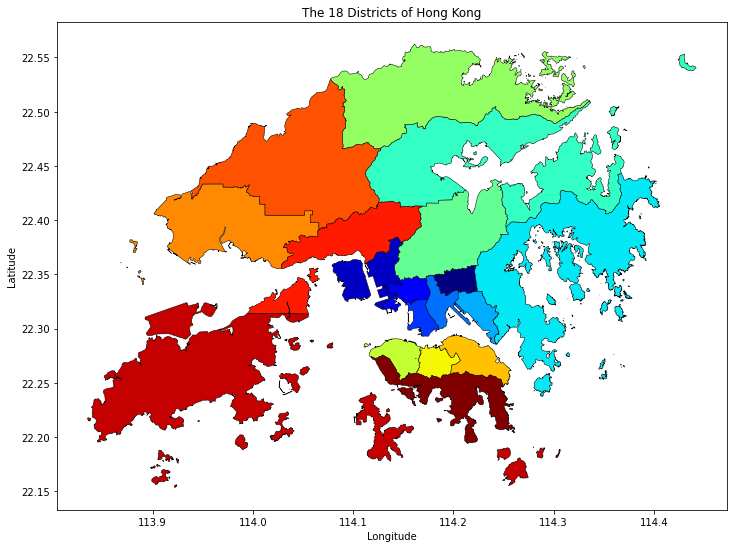

In [2]:
hk_map.plot(figsize=(12,12),cmap='jet',edgecolor='k',linewidth=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('The 18 Districts of Hong Kong')

In [3]:
data = pd.read_excel('../../2019/GIS_examples/HK_18Districts/HK_18dist.xlsx')
data.head()

,District,Chinese,Region,Population,Male,Female,Area,Density,Seats,Median monthly household income,poverty rate pre,FT working population
0,Central and Western,中西區,Hong Kong Island,243266,108695,134571,12.44,19555.144695,15,41000,0.139,0.498
1,Eastern,東區,Hong Kong Island,555034,249871,305163,18.56,29904.849138,35,33000,0.148,0.470
2,Islands,離島區,New Territories,156801,73525,83276,175.12,895.391731,18,31300,0.201,0.442
3,Kowloon City,九龍城區,Kowloon,418732,188717,230015,10.02,41789.620758,24,29500,0.169,0.462
4,Kwai Tsing,葵青區,New Territories,520572,243465,277107,23.34,22303.856041,30,25000,0.243,0.449


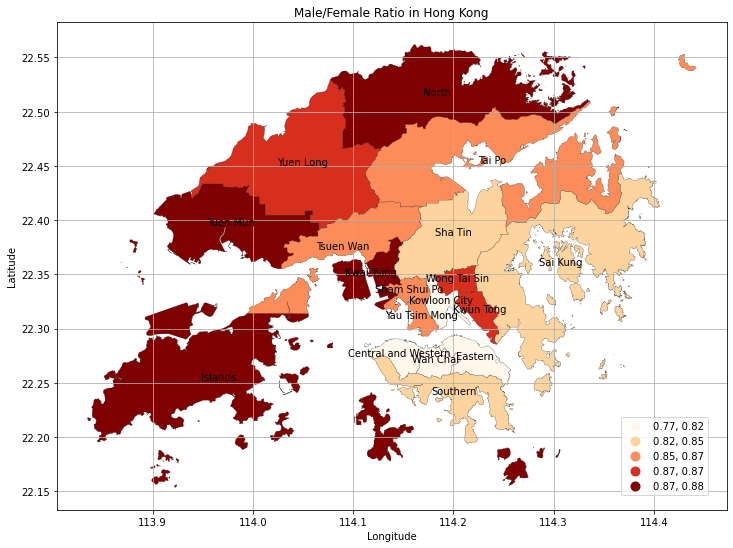

In [4]:
data.rename(columns={'Chinese':'TCNAME'},inplace=True) # change the column name "Chinese" to "TCNAME" - exactly the same
data['ratio'] = data['Male']/data['Female'] # calculate a new column data which is the Male/Female ratio

hk_map_pop = hk_map.merge(data,on='TCNAME') # merge the two GeoDataFrames based on the column index "TCNAME"

ax = hk_map_pop.plot(column='ratio',edgecolor='k',linewidth=0.2,figsize=(12,12),cmap = 'OrRd',
                     scheme='quantiles',legend=True) # generate a plot colored by the data column 'ratio' 
leg = ax.get_legend() # show the colorbar (legend)
leg.set_bbox_to_anchor((0., 0., 0.98, 0.2)) # specify the location of the colorbar near the right corner
ax.set_title('Male/Female Ratio in Hong Kong') # add title
ax.set_xlabel('Longitude') # add x-label
ax.set_ylabel('Latitude')  # add y-label
ax.grid(True)              # add lon-lat grid lines

hk_map_pop.apply(lambda x: ax.annotate(text=x.District, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

### 2. Obesity in the US, by county and states [50%]

Obesity has truly become a worldwide problem, affecting countries rich and poor. So just how many men, women, and children are overweight or obese? It’s a natural question-and a surprisingly hard one for researchers to answer. The problem’s vast. The data, from some regions, quite spotty. So projections from one group differ a bit from the estimates of another. But all point to tremendous increases in global obesity rates over the past three decades-and find that the epidemic shows no signs of abating without dedicated efforts to combat it (source: Harvard Medical School).

Let's focus on the obesity data files from the US CDC on 2008 (I don't have the most recent data..) to generate visualization and analysis for the obesity problem in the Stats - you've already learned how bad it is in the in-class practice.

First let's generate a map for the US colored by the GDP per capita data:
- load the data file 'us_states.geojason' using geopandas in to a geopandas dataframe, take a look at the  dataframe
- create a new column named "gdp_per_cap" which is the GDP per capita for each state (use the "gdp" and "opulation" columns"
- generate a color map with the gdp_per_cap column data for the US

Then let's generate another map for the Obesity data based on county: 
- load the data file 'county.geo.json' using geopandas in to a **geopandas** dataframe, take a look at the  dataframe (the data file is large since it contains all the geometric information of US counties) 
- drop the data for Alaska and Hawaii based on the "state" column (state=='AK' and state=='HI'). Doesn't mean we don't like these states, just make the map more readable..
- the column 'NAMELSAD10' is the name of each county, change the column name to 'county_name'
- load the obesity data file "2008_estimated_obesity_by_us_county.csv" in to a **pandas** data frame
- now merge the pandas dataframe into the geopandas dataframe based on the column "county_name"
- generate a colored map for the column "age_adjusted_percent", this is the distribution of the obesity in the States
- which county has the highest percentage of obesity? which state is that in? (hint: use the "age_adjusted_percent" column to find the maximum and use the "state_name" colume to find out the name of the corresponding state)

[extra credit 10%] Generate a plot of state-averaged obesity (use the data "age_adjusted_percent" column), i.e., calculate the average percent for each state and color the map based on states instead of counties.

[extra credit 10%] Derive a linear relationship between the average obesity percentage and the gdp per capita for each state.

In [5]:
us_states = gpd.read_file('/Users/binzh/us_states.geojason')
us_states['gdp_per_cap'] = us_states['gdp']/us_states['population']
us_states.head()

,state,population,gdp,geometry,gdp_per_cap
0,Minnesota,5303925,379388000000,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",71529.669066
1,Montana,989415,51934000000,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",52489.602442
2,North Dakota,672591,54044000000,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",80351.952375
3,Idaho,1567582,85552000000,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",54575.773389
4,Washington,6724540,632013000000,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",93986.057039


0            Annotation(-94.1774, 46.3601, 'Minnesota')
1              Annotation(-109.659, 47.0485, 'Montana')
2         Annotation(-100.485, 47.4627, 'North Dakota')
3                 Annotation(-114.655, 44.394, 'Idaho')
4           Annotation(-120.398, 47.3798, 'Washington')
5              Annotation(-111.659, 34.2956, 'Arizona')
6           Annotation(-119.641, 37.2551, 'California')
7             Annotation(-105.545, 39.0001, 'Colorado')
8                Annotation(-116.65, 39.3481, 'Nevada')
9           Annotation(-106.086, 34.4166, 'New Mexico')
10              Annotation(-120.539, 43.9448, 'Oregon')
11                Annotation(-111.669, 39.3288, 'Utah')
12             Annotation(-107.554, 43.0271, 'Wyoming')
13            Annotation(-92.4449, 34.9218, 'Arkansas')
14                Annotation(-93.5064, 42.0839, 'Iowa')
15              Annotation(-98.3802, 38.4829, 'Kansas')
16            Annotation(-92.4794, 38.3795, 'Missouri')
17            Annotation(-99.8153, 41.5251, 'Neb

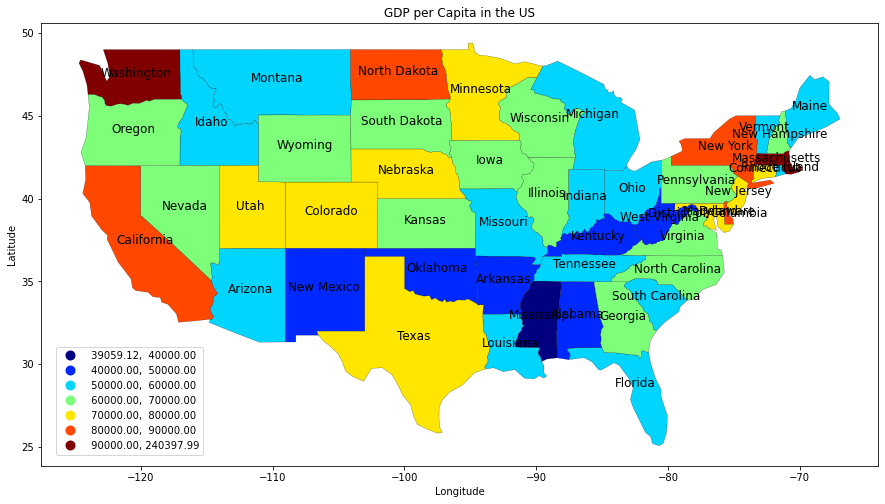

In [6]:
ax = us_states.plot(figsize=(15,10),column='gdp_per_cap',edgecolor='k',linewidth=0.2,cmap='jet',scheme='userdefined',\
                    classification_kwds=dict(bins=[40000,50000,60000,70000,80000,90000]),legend=True)

leg = ax.get_legend() # add a legend
leg.set_bbox_to_anchor((0.05, 0., 0.15, 0.28)) # specify the location of the legend (left corner)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GDP per Capita in the US')
us_states.apply(lambda x: ax.annotate(text=x.state, xy=x.geometry.centroid.coords[0],\
                                      ha='center',fontsize=12),axis=1)

In [7]:
county = gpd.read_file('/Users/binzh/Downloads/county.geo.json')
county.head()

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,CBSAFP10,METDIVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,state,geometry
0,02,013,01419964,02013,Aleutians East,Aleutians East Borough,04,H1,G4020,None,None,None,A,18083148800,20792209033,+55.2437223,-161.9507485,AK,"MULTIPOLYGON (((-162.63769 54.80112, -162.6411..."
1,02,016,01419965,02016,Aleutians West,Aleutians West Census Area,05,H5,G4020,None,None,None,S,11370762625,25190643524,+51.9594469,+178.3388130,AK,"MULTIPOLYGON (((177.44593 52.11133, 177.44302 ..."
2,28,107,00695776,28107,Panola,Panola County,06,H1,G4020,None,None,None,A,1774515519,51767046,+34.3652052,-089.9630654,MS,"POLYGON ((-90.13476 34.22603, -90.13476 34.226..."
3,28,101,00695773,28101,Newton,Newton County,06,H1,G4020,None,None,None,A,1497282694,3879399,+32.4019702,-089.1184115,MS,"POLYGON ((-89.13497 32.57697, -89.13466 32.576..."
4,28,027,00695738,28027,Coahoma,Coahoma County,06,H1,G4020,None,17260,None,A,1430818231,79539470,+34.2286699,-090.6031650,MS,"POLYGON ((-90.59063 33.98690, -90.59473 33.986..."


In [8]:
county = county[(county.state!='AK')]
county = county[(county.state!='HI')]

In [9]:
# first change the column names slightly
county.rename(columns={'NAMELSAD10':'county_name'}, inplace=True)

In [10]:
df=pd.read_csv('/Users/binzh/Downloads/2008_estimated_obesity_by_us_county.csv')
df.head()

,state_name,county_name,state_fips,county_fips,age_adjusted_percent,age_adjusted_percent_sd,age_adjusted_percent_95l,age_adjusted_percent_p5u,est_percent,percent_sd,percent_95l,percent_95u,estimated_total,estimated_total_sd,estimated_total_95l,estimated_total_95h,v1,v2,obesity_bin,obesity_category
0,ALASKA,Aleutians East Borough,2,13,28.6,4.8,20.1,39.1,28.4,4.9,19.8,39.3,690,119,481,954,NaN,NaN,3,2
1,ALASKA,Aleutians West Census Area,2,16,30.2,4.5,22.3,39.8,30.0,4.6,22.0,39.9,1169,179,855,1553,NaN,NaN,4,4
2,ALASKA,Anchorage Municipality,2,20,26.6,1.5,23.6,29.6,26.5,1.5,23.4,29.5,52590,3080,46530,58630,NaN,NaN,2,1
3,ALASKA,Bethel Census Area,2,50,32.1,2.9,26.5,38.2,31.9,2.9,26.3,37.8,3254,297,2684,3861,NaN,NaN,4,5
4,ALASKA,Bristol Bay Borough,2,60,32.2,5.9,22.0,45.1,32.6,6.0,22.3,45.9,231,42,158,325,NaN,NaN,4,5


In [11]:
obe = county.merge(df, on="county_name", how = 'inner') # merge the obesity dataframe into the geopandas frame
obe.head()

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,county_name,LSAD10,CLASSFP10,MTFCC10,CSAFP10,...,percent_95l,percent_95u,estimated_total,estimated_total_sd,estimated_total_95l,estimated_total_95h,v1,v2,obesity_bin,obesity_category
0,28,107,00695776,28107,Panola,Panola County,06,H1,G4020,None,...,29.8,39.1,8527,590,7403,9729,NaN,NaN,5,5
1,28,107,00695776,28107,Panola,Panola County,06,H1,G4020,None,...,22.5,34.8,4837,539,3855,5960,NaN,NaN,3,2
2,48,365,01383968,48365,Panola,Panola County,06,H1,G4020,None,...,29.8,39.1,8527,590,7403,9729,NaN,NaN,5,5
3,48,365,01383968,48365,Panola,Panola County,06,H1,G4020,None,...,22.5,34.8,4837,539,3855,5960,NaN,NaN,3,2
4,28,101,00695773,28101,Newton,Newton County,06,H1,G4020,None,...,24.2,35.1,3108,294,2567,3728,NaN,NaN,3,2


Text(0.5, 1.0, 'Average rate of obesity in the US')

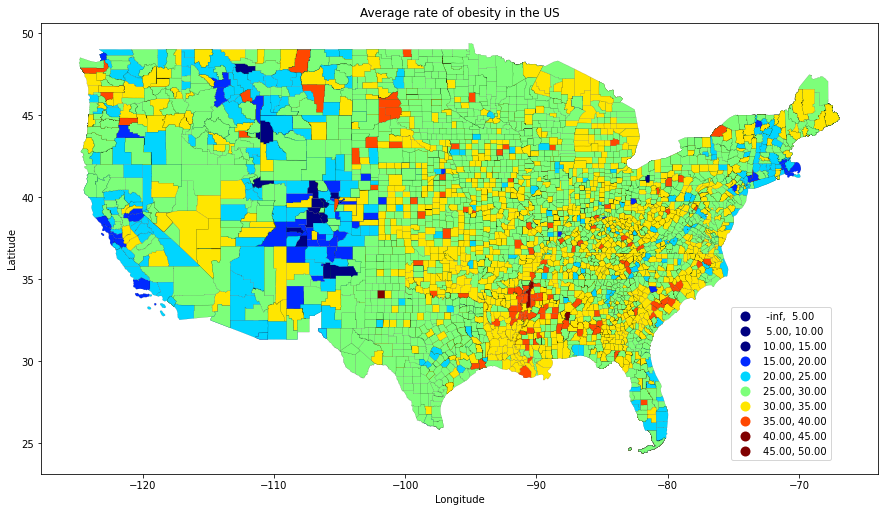

In [12]:
ax = obe.plot(figsize=(15,10),column = 'age_adjusted_percent',edgecolor='k',linewidth=0.1,cmap='jet',scheme='userdefined', \
              classification_kwds=dict(bins=np.arange(5,55,5)),legend=True)

leg = ax.get_legend() # add a legend
leg.set_bbox_to_anchor((0.8, 0.1, 0.15, 0.28)) # specify the location of the legend (left corner)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average rate of obesity in the US')

In [13]:
print('The county that has the highest obesity percentage is ',\
      obe.county_name[obe['age_adjusted_percent'].idxmax()], 'in', obe.state_name[obe['age_adjusted_percent'].idxmax()] )


The county that has the highest obesity percentage is  Greene County in ALABAMA


Extra credit 1

In [14]:
# first let's group the average percentage of obesity by state using the .dissolve() function of geopandas:
# NOTE: This may take a while depending on the power of the CPU. 
#       On my computer, it took about 4 minutes to finish the aggregation
obe_by_state=obe.dissolve(by='state',aggfunc='mean')

In [15]:
obe_by_state.head()

,geometry,ALAND10,AWATER10,state_fips,county_fips,age_adjusted_percent,age_adjusted_percent_sd,age_adjusted_percent_95l,age_adjusted_percent_p5u,est_percent,...,percent_95l,percent_95u,estimated_total,estimated_total_sd,estimated_total_95l,estimated_total_95h,v1,v2,obesity_bin,obesity_category
state,,,,,,,,,,,,,,,,,,,,,
AL,"POLYGON ((-88.40620 30.58971, -88.40634 30.592...",2.022437e+09,4.439713e+07,24.587699,95.633257,30.339863,2.819134,25.206606,36.239863,30.320273,...,25.340319,36.003872,16705.006834,1147.938497,14575.560364,19070.218679,NaN,NaN,3.603645,3.152620
AR,"POLYGON ((-91.23090 33.56140, -91.23142 33.560...",1.836063e+09,3.616602e+07,25.714019,92.263551,29.727103,2.850467,24.551589,35.707290,29.706168,...,24.697570,35.450280,15089.293458,1020.383178,13198.424299,17193.042991,NaN,NaN,3.409346,2.936449
AZ,"POLYGON ((-110.46017 31.33283, -110.46203 31.3...",1.766511e+10,5.990557e+07,6.894737,29.473684,26.042105,2.394737,21.694737,31.026316,25.726316,...,21.621053,30.384211,59735.842105,3360.105263,53401.315789,66589.473684,NaN,NaN,2.315789,1.578947
CA,"MULTIPOLYGON (((-118.32890 32.87504, -118.3297...",5.864587e+09,3.378534e+08,13.552941,69.894118,25.023529,2.832941,19.974118,31.063529,25.129412,...,20.138824,31.063529,83578.235294,5308.000000,73657.682353,94449.835294,NaN,NaN,1.917647,0.988235
CO,"POLYGON ((-102.27023 36.99433, -102.27035 36.9...",4.090009e+09,1.949754e+07,25.404762,77.202381,26.222619,2.735714,21.303571,32.004365,26.299603,...,21.516270,31.873413,13939.793651,903.765873,12256.619048,15799.789683,NaN,NaN,2.587302,1.853175


state
AL    Annotation(-86.8445, 32.7569, 'AL')
AR    Annotation(-92.4392, 34.8998, 'AR')
AZ    Annotation(-111.664, 34.2931, 'AZ')
CA    Annotation(-119.664, 37.2153, 'CA')
CO    Annotation(-105.548, 38.9985, 'CO')
CT    Annotation(-72.7383, 41.5752, 'CT')
DE     Annotation(-75.4525, 38.995, 'DE')
FL    Annotation(-82.4664, 28.4771, 'FL')
GA    Annotation(-83.4271, 32.6386, 'GA')
IA    Annotation(-93.5001, 42.0746, 'IA')
ID    Annotation(-114.659, 44.3891, 'ID')
IL    Annotation(-89.1486, 40.1242, 'IL')
IN    Annotation(-86.2818, 39.9199, 'IN')
KS    Annotation(-98.3802, 38.4847, 'KS')
KY    Annotation(-85.2906, 37.5266, 'KY')
LA     Annotation(-91.8141, 30.909, 'LA')
MA     Annotation(-71.504, 42.1601, 'MA')
MD    Annotation(-76.6872, 38.9465, 'MD')
ME    Annotation(-69.2028, 45.2743, 'ME')
MI     Annotation(-85.731, 44.8748, 'MI')
MN    Annotation(-94.1983, 46.3491, 'MN')
MO    Annotation(-92.4774, 38.3676, 'MO')
MS    Annotation(-89.6535, 32.7133, 'MS')
MT    Annotation(-109.645, 4

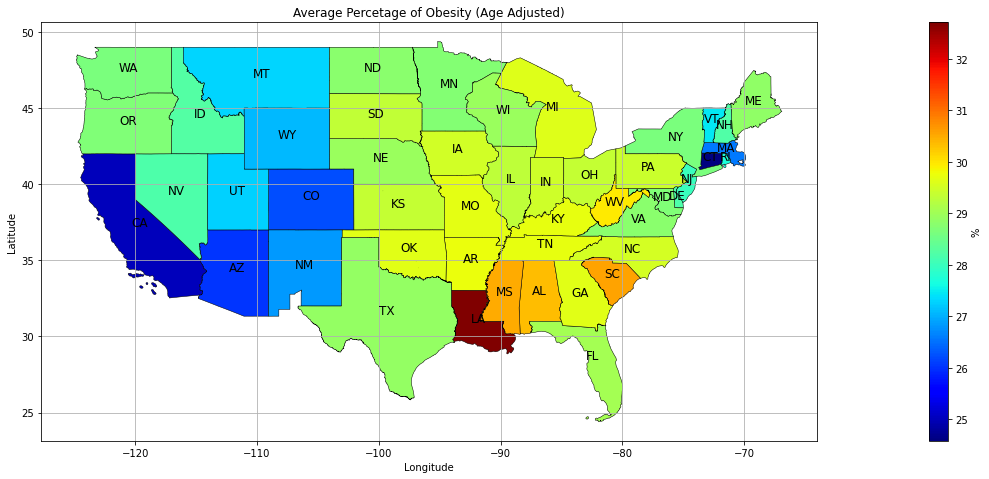

In [18]:
# now let's make a plot 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib import cm

# a map for gdp per capita with a colorbar
# column argument specifies the variable the color is based on
ax = obe_by_state.plot(figsize=(18,12),column = 'age_adjusted_percent',edgecolor='k',\
                       linewidth=0.5,cmap='jet',legend=False)

ax.set_title('Average Percetage of Obesity (Age Adjusted)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

norm = Normalize(vmin = obe_by_state['age_adjusted_percent'].min(), \
                 vmax = obe_by_state['age_adjusted_percent'].max())
n_cmap = cm.ScalarMappable(norm = norm, cmap = 'jet')
n_cmap.set_array([])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.2)
bar = ax.get_figure().colorbar(n_cmap,ax=ax,cax=cax)
bar.set_label('%');

# generate a new column named "Code" in the geopandas dataframe
obe_by_state['Code']=obe_by_state.index
obe_by_state.apply(lambda x: ax.annotate(text=x.Code, xy=x.geometry.centroid.coords[0], ha='center',fontsize=12,color='k'),axis=1)

Extra credit 2 - you need to combine the gdp_per_capita data and the age_adjusted_percent data colums first
first let's map the State names to two-letters

Text(0, 0.5, 'Average percentage of obesity by state')

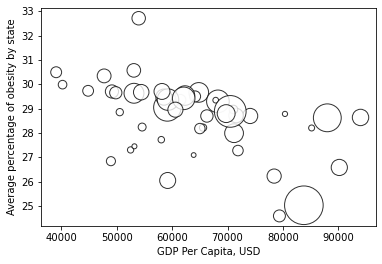

In [19]:
us_state_to_abbrev = {
"Alabama": "AL",
"Alaska": "AK",
"Arizona": "AZ",
"Arkansas": "AR",
"California": "CA",
"Colorado": "CO",
"Connecticut": "CT",
"Delaware": "DE",
"Florida": "FL",
"Georgia": "GA",
"Hawaii": "HI",
"Idaho": "ID",
"Illinois": "IL",
"Indiana": "IN",
"Iowa": "IA",
"Kansas": "KS",
"Kentucky": "KY",
"Louisiana": "LA",
"Maine": "ME",
"Maryland": "MD",
"Massachusetts": "MA",
"Michigan": "MI",
"Minnesota": "MN",
"Mississippi": "MS",
"Missouri": "MO",
"Montana": "MT",
"Nebraska": "NE",
"Nevada": "NV",
"New Hampshire": "NH",
"New Jersey": "NJ",
"New Mexico": "NM",
"New York": "NY",
"North Carolina": "NC",
"North Dakota": "ND",
"Ohio": "OH",
"Oklahoma": "OK",
"Oregon": "OR",
"Pennsylvania": "PA",
"Rhode Island": "RI",
"South Carolina": "SC",
"South Dakota": "SD",
"Tennessee": "TN",
"Texas": "TX",
"Utah": "UT",
"Vermont": "VT",
"Virginia": "VA",
"Washington": "WA",
"West Virginia": "WV",
"Wisconsin": "WI",
"Wyoming": "WY",
"District of Columbia": "DC",
"American Samoa": "AS",
"Guam": "GU",
"Northern Mariana Islands": "MP",
"Puerto Rico": "PR",
"United States Minor Outlying Islands": "UM",
"U.S. Virgin Islands": "VI",
}

# map a column using dict
us_states['Code'] = us_states['state'].map(us_state_to_abbrev)
us_states.head()

# generate a new column named "Code" in the geopandas dataframe
obe_by_state['Code']=obe_by_state.index
obe_by_state.head()

# merge
df = obe_by_state.merge(us_states, on="Code", how = 'inner')
df.head()

plt.scatter(df['gdp_per_cap'],df.age_adjusted_percent,s=df.population/1e6*40,color='w',edgecolor='k',alpha=0.8)
plt.xlabel('GDP Per Capita, USD')
plt.ylabel('Average percentage of obesity by state')

Now let's try a linear curve fitting

Text(0.5, 1.0, 'US average obesity by state')

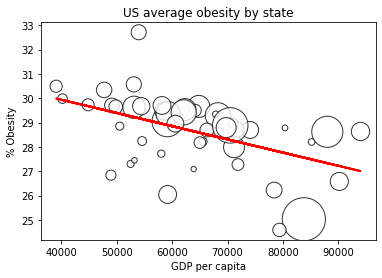

In [22]:
from scipy.optimize import curve_fit # import function curve_fit


# now lets try fit
def func(x,a,b):
    return a + b*x

time = np.array(df.gdp_per_cap)
temp = np.array(df.age_adjusted_percent)
popt, pcov = curve_fit(func, time, temp) # curve fitting, popt has the a,b,c calculated by SciPy
plt.scatter(df['gdp_per_cap'],df.age_adjusted_percent,s=df.population/1e6*50,color='w',edgecolor='k',alpha=0.8)
plt.plot(time, func(time, *popt), linewidth=2,color='r')
plt.xlabel('GDP per capita')
plt.ylabel('% Obesity')
plt.title('US average obesity by state')

### 3. IGRF field and Magnetic Equator [20%]

In 1600, William Gilbert hypothesized that the Earth itself was a giant bar magnetic and that this gave rise to the Earth's **magnetic field**!  If it were true - that the source of the magnetic field behaved like a giant bar magnet - then the **inclination** of the **magnetic field** would only vary as a function of latitude. 

**Inclination** is the angle between the horizontal and the direction of the field. If the field were generated by a bar magnet, then the **inclination** would be horizontal (0 $^\circ$) at the equator and vertical ($\pm 90 ^\circ$) at the North and South poles. The geographic location where the inclination is zero is called the **Magnetic Equator**
   
Let's Use the function **magMap( )** based on the IGRF module to evaluate the actual inclination (that is the "Is" array in the lecture notes) of IGRF for the year 2000.

- download the **mkigrf** module from moodle and import into Python (make sure that the module is in the same directory as your ipynb file)
- call the magMap( ) function, e.g.:
    
        Ds,Is,Bs,lons,lats=magMap(date,lon_0=0)
  where "date" is basically the year of the IGRF model
    
- Use **meshgrid( )** to make a 2-D array of the latitudes and longitudes that were returned from **magMap( )** (the function is given in the following code cell, which is based on the mkigrf module)
- generate a global map (PlateCarree, Orthogrophic, Robinson, etc., your choice)
- then use contourf() to make a color plot of the actual inclination on top of your global map projection
- in the same map, show the magnetic equator by finding the zero inclination contour ($Is = 0$)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mkigrf
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

def magMap(date,**kwargs):
    """
    generates the data for a map of the magnetic field. 
    Inputs: 
    required: 
        date = decimal year for evaluation (between 1900 and 2020)
    optional: 
        lon_0 = desired zero longitude
    
    Returns: 
    
    Bdec = declinations
    Binc = inclinations
    B = field strength (in microtesla)
    lons = array of longitudes
    lats = array of latitudes

    """
    if 'lon_0' in kwargs.keys(): # check if there are keyword arguments
        lon_0=kwargs['lon_0'] # if lon_0 is set, use that one
    else: # otherwise..... 
        lon_0=0. # set the default lon_0 to 0. 
    
    incr=3 # we can vary to the resolution of the model
    lonmax=(lon_0+180.)%360+incr # get some parameters for our arrays of lat/lon
    lonmin=(lon_0-180.)
    latmax=90+incr
    lons=np.arange(lonmin,lonmax,incr) # make a 1D array of longitudes (like elons)
    lats=np.arange(-90,latmax,incr)# make a 1D array of longitudes (like elats)
        
    # set up some containers for the field elements
    lenLats, lenLons = len(lats), len(lons)
    B=np.zeros((lenLats,lenLons))
    Binc=np.zeros((lenLats,lenLons))
    Bdec=np.zeros((lenLats,lenLons))
    Brad=np.zeros((lenLats,lenLons))
    
    for j in range(lenLats): # step through the latitudes
        for i in range(lenLons): # and the longitudes
            x,y,z,f=mkigrf.doigrf(lons[i],lats[j],date)  # get the field elements
            Dec,Inc,Int=mkigrf.cart2dir(x,y,z) # turn them into polar coordites
            B[j][i]=Int*1e-3 # convert the string to microtesla (from nT)
            Binc[j][i]=Inc # store the inclination value
            Bdec[j][i]=Dec # store the declination value
    return Bdec,Binc,B,lons,lats # return the arrays.  

date=2024 # let's do this for 2018 (actually, this is the beginning of 2017)
lon_0=0 # we can specify the grid spacing and the intended 0 longitude for the plot
Ds,Is,Bs,lons,lats=magMap(date,lon_0=lon_0)

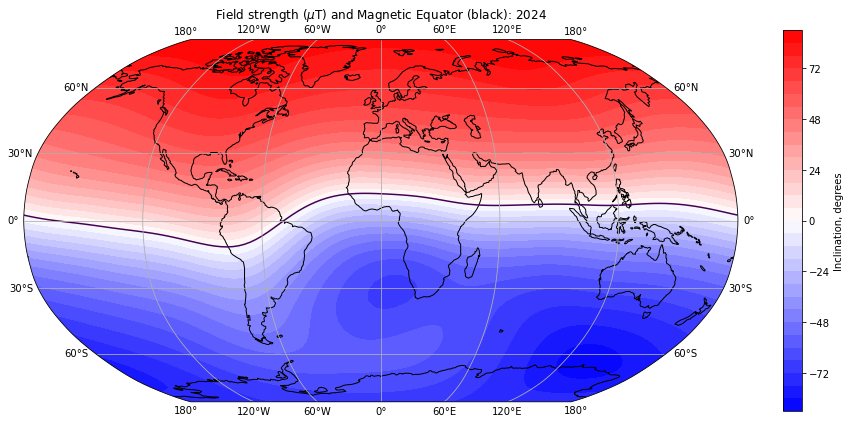

In [6]:
fig = plt.figure(figsize=(16,7)) # create a figure with asize of (20,15)
ax = plt.axes(projection = ccrs.Robinson()) # create a map project of PlateCarree

ax.coastlines(resolution='110m') # plot coastlines
ax.gridlines(draw_labels = True) # add grid lines

xx, yy = np.meshgrid(lons,lats) # mesh a 2-D lon-lat grid
mesh = ax.contourf(xx,yy,Is,30,cmap='bwr',transform=ccrs.PlateCarree()) # fill contours
ax.contour(xx,yy,Is,levels=[0],transform=ccrs.PlateCarree()) # fill contours

bar = fig.colorbar(mesh) # add a colorbar
bar.set_label('Inclination, degrees') # add label
plt.title('Field strength ($\mu$T) and Magnetic Equator (black): '+str(date)); #label 

### 4. Global humidity distribution from WACCM data [20%]

The Whole Atmosphere Community Climate Model (WACCM) is a comprehensive numerical model, spanning the range of altitude from the Earth's surface to the thermosphere (~ 120 km altitude). The WACCM code is now being run in real-time, driven by meteorological forecasts from NASA/GMAO GEOS-5. The model results are open for research and teaching, available at https://www.acom.ucar.edu/waccm/download.shtml. Let's use try the WACCM model output (netcdf files) for visualization of the Earth's surface humidity.

- First download the data file "waccm-data-20230101.nc" from the Moodle page.
- The netcdf files are a very popular type of climate model output data, to read netcdf files, we use the xarray module, for example: 

        import xarray as xr
    Now use the .open_dataset() function to load the data into an xarray object:
        ds3 = xr.open_dataset('waccm-data-20230101.nc')
    here ds3 is an object for the netcdf file (it's like a data frame but not based on pandas)
- type "ds3" in a code cell and take a look at the output
- the latitude and longitude arrays (1-D) are **ds3.lat** and **ds3.lon** (similar to the elons, elats arrays used as examples in Lecture 20)
- use the **meshgrid()** function to generate a 2-D mesh using the 1-D lat and lon arrays for color plotting, pay attention to the shap of the 2D lat-lon mesh arrays
- the humidity data is **ds3.Q**, to access the humidity at the surface, we need only one altitude level of the 4-D xarray, which is the last index of the second dimension, using this: **humidity = ds3.Q[0,-1,:,:]**, this is basically a 2-D slice of the humidity data array, which is the lat-lon distribution of the surface humidity
- Generate a global map projection use Cartopy, e.g., plateCarree projection.
- now use either the .pcolor() or .contourf() function to visualize the specific humidity at the surface of the Earth, together with your map projection. Conclude your plot.

In [7]:
import xarray as xr

ds3 = xr.open_dataset('~/Downloads/waccm-data-20230101.nc')
ds3

<xarray.Dataset>
Dimensions:  (lon: 288, lat: 192, ilev: 89, lev: 88, time: 1)
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * ilev     (ilev) float64 4.5e-06 7.42e-06 1.223e-05 ... 970.0 985.0 1e+03
  * lev      (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 962.5 977.5 992.5
  * time     (time) datetime64[ns] 2023-01-01
Data variables:
    H2O      (time, lev, lat, lon) float32 ...
    M_dens   (time, lev, lat, lon) float32 ...
    O3       (time, lev, lat, lon) float32 ...
    PM25     (time, lev, lat, lon) float32 ...
    Q        (time, lev, lat, lon) float32 ...
    T        (time, lev, lat, lon) float32 ...
    U        (time, lev, lat, lon) float32 ...
    V        (time, lev, lat, lon) float32 ...
    Z3       (time, lev, lat, lon) float32 ...
    date     (time) int32 ...
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      f.e22.beta02.FWSD.f09_f09_mg17.cesm2_2_beta02....
    logname:                   shawnh
    host:                      x86_64-conda-lin
    initial_file:              f.e22.beta02.FWSD.f09_f09_mg17.cesm2_2_beta02....
    topography_file:           /glade/p/cesmdata/cseg/inputdata/atm/cam/met/M...
    model_doi_url:             https://doi.org/10.5065/D67H1H0V
    time_period_freq:          hour_6
    history:                   Mon Apr  8 21:24:52 2024: /usr/bin/ncrcat --ov...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1

In [8]:
x = ds3.lon
y = ds3.lat
xx, yy = np.meshgrid(x, y) # make a meshgrid
print(x.shape)
print(y.shape)
print(xx.shape)
print(yy.shape)

(288,)
(192,)
(192, 288)
(192, 288)


In [9]:
humidity = ds3.Q[0,-1,:,:]
humidity.shape

(192, 288)

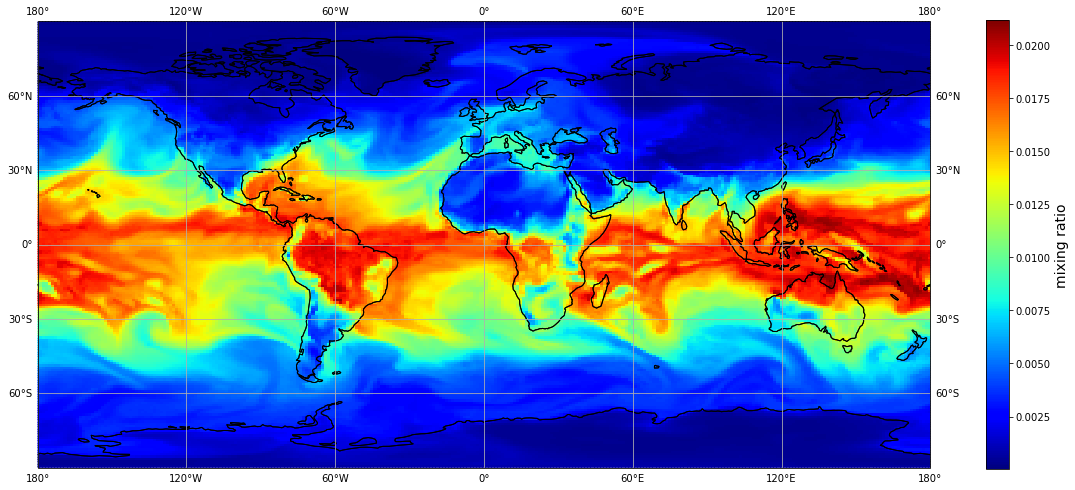

In [10]:
# now make a map projection

fig = plt.figure(figsize=(20,15)) # create a figure with a size of (20,15)
# create a map project of PlateCarree
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.coastlines() # plot coastlines
ax.coastlines(resolution='110m') # set the coastline resolution - optional
ax.gridlines(draw_labels = True) # draw lat-lon labels

# then add 2-D contourf plots for humidity
#mesh = ax.contourf(xx,yy,humidity,50,cmap='jet',transform=ccrs.PlateCarree())
mesh = ax.pcolor(xx,yy,humidity,cmap='jet',transform=ccrs.PlateCarree())

bar = fig.colorbar(mesh,shrink=0.55) # add colorbar
bar.set_label('mixing ratio',fontsize=14) # add label

well, of course the humidity is highest near the equator!